<head><center><b>CIENCIA DE DATOS<br>
APRENDIZAJE NO SUPERVISADO<br>
Agrupamiento (Clustering)</b></center>

<center>Profesor: Gabriel Jara </center></head><br>




El presente Jupyter Notebook:
<ul>
    <li>Acompaña la presentación vista en clase, es decir no incluye la explicación.</li>
    <li>Realizar demostración de algoritmos de clustering presentados en la Unidad 2 usando datos artificiales.</li>
    <li>Ilustra como usar clustering para explorar un set de datos más realista.</li>
</ul>

<b>K-means</b>

Crearemos cuatro nubes de puntos y veamos si podemos reconocer que cada una es un cluster, usando <i>K-means</i>.

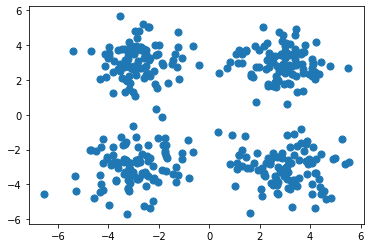

In [1]:
# Importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt

# Definimos una función para generar puntos aleatorios alrededor de un centro
def generar_puntos(n_puntos, centro=None, desviacion=1.0):
    # Si no se proporciona un centro, generamos uno aleatorio dentro de un rango
    if centro is None:
        centro = np.random.uniform(-10, 10, size=2)
    # Generamos puntos aleatorios siguiendo una distribución normal alrededor del centro
    puntos = np.random.normal(loc=centro, scale=desviacion, size=(n_puntos, 2))
    return puntos

# Generamos datos para varios clusters
puntos_cluster_1 = generar_puntos(100, centro=[-3, -3], desviacion=1)
puntos_cluster_2 = generar_puntos(100, centro=[3, 3], desviacion=1)
puntos_cluster_3 = generar_puntos(100, centro=[-3, 3], desviacion=1)
puntos_cluster_4 = generar_puntos(100, centro=[3, -3], desviacion=1)

# Unimos todos los puntos en un solo conjunto de datos
X = np.vstack([puntos_cluster_1, puntos_cluster_2, puntos_cluster_3, puntos_cluster_4])

# Visualizamos los datos antes de aplicar K-means
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.show()

Vimos en clase que el método del codo nos permite identificar el número de clusteres que logra mayor ganacia en cuanto a la reducción de distancia de las observaciones respecto al centroide asignado. 

A continuación aplicamos sucesivamente <i>K-means</i> analizando la suma de las distancias al cuadrado de cada punto de datos a su centroide más cercano, lo que se conoce como la "inercia" o "varianza interna" del modelo. Esto nos permitirá usar el <b>Método del Codo</b> para decidir cuantos clusteres resultan más coherentes. 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


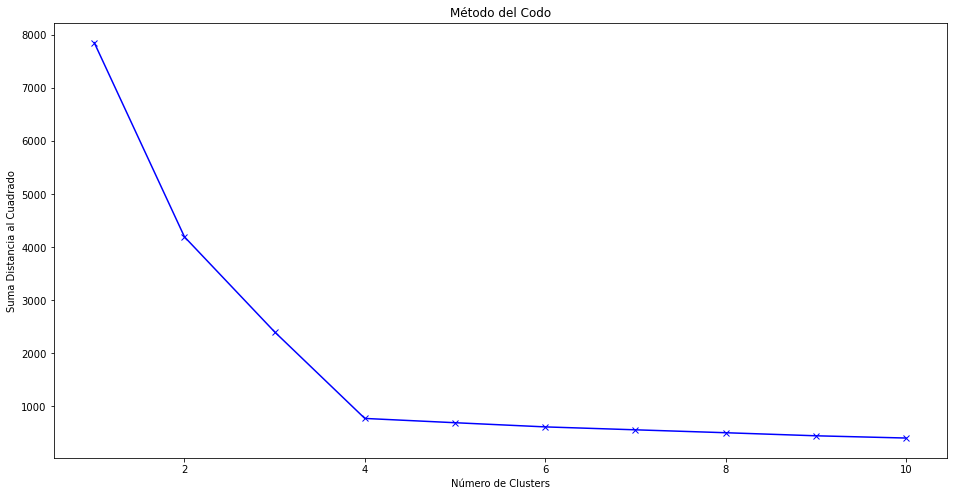

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Usaremos el método del codo para identificar el número adecuado de clusteres
distancia=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X)
    distancia.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),distancia, 'bx-')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Suma Distancia al Cuadrado')
plt.show()

Visualmente identificamos que cuatro es el número adecuado de clusteres. Este análisis se puede automatizar, aunque acá no lo hemos hecho. 

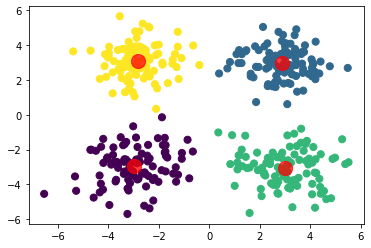

In [3]:
from sklearn.cluster import KMeans

# Definimos el modelo de K-means con el número de clusters que queremos encontrar
kmeans = KMeans(n_clusters=4)

# Ajustamos el modelo a los datos (entrenamos el modelo)
kmeans.fit(X)

# Obtenemos las etiquetas de los clusters para cada punto de datos
y_kmeans = kmeans.predict(X)

# Visualizamos los datos con los clusters encontrados por K-means
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Dibujamos los centros de los clusters
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.show()

Apreciamos como <i>K-means</i> asigna bastante bien cada observación a un cluster. 

Se recomienda a los estudiantes jugar con esta implementación, prueben otros números de clusteres y vea como da. En este jupyter vamos a probar otros algoritmos con datos construidos con procesos diferentes, sería bueno probar como le va a <i>K-means</i> con esos otros datos, para entender mejor las limitaciones de este algoritmo. 

<b>DBSCAN</b>

Generaremos datos que no serían adecuados para <i>K-means</i>, pero que sí puedan ser bien agrupados con <i>DBSCAN</i>. 

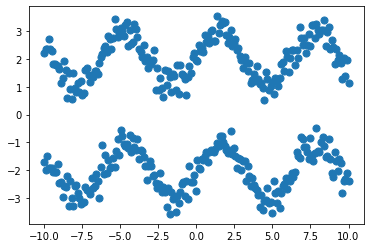

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Función para generar puntos en forma sinusoidal
def generar_sinusoidal(n_puntos, altura=0, amplitud=1.0, frecuencia=1.0, ruido=0.1):
    # Generamos n puntos equidistantes en el eje x
    x = np.linspace(-10, 10, n_puntos)
    # Generamos los valores y como una función sinusoidal de x
    y = amplitud * np.sin(frecuencia * x) + np.random.normal(0, ruido, n_puntos)+altura
    # Combinamos x e y en un solo conjunto de puntos
    return np.vstack((x, y)).T

# Generamos los puntos en forma de onda sinusoidal
sinusoidal_1 = generar_sinusoidal(200, altura=-2, amplitud=1, frecuencia=1, ruido=0.3)
sinusoidal_2 = generar_sinusoidal(200, altura=2, amplitud=1, frecuencia=1, ruido=0.3)

# Unimos todos los puntos en un solo conjunto de datos
X = np.vstack([sinusoidal_1, sinusoidal_2])

# Visualizamos los datos generados
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.show()


Incluyamos algunos <i>Outliers</i>, es decir observaciones que se comportan distinto al resto en la muestra, que parecen generados con otros mecanismos. 

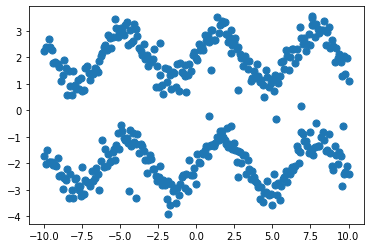

In [5]:
# Función para generar puntos aleatorios con distribución uniforme
def generar_uniforme(n_puntos, rango_x=(-10, 10), rango_y=(-10, 10)):
    # Generamos n puntos uniformemente distribuidos en el rango especificado para x e y
    x = np.random.uniform(rango_x[0], rango_x[1], n_puntos)
    y = np.random.uniform(rango_y[0], rango_y[1], n_puntos)
    
    # Combinamos x e y en un solo conjunto de puntos
    return np.vstack((x, y)).T

# Agreguemos algunos OUTLIERS
outliers = generar_uniforme(20, rango_x=(-10, 10), rango_y=(-4, 4))

# Unimos todos los puntos en un solo conjunto de datos
X = np.vstack([sinusoidal_1, sinusoidal_2, outliers])

# Visualizamos los datos generados
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.show()


Ustedes pueden probar que pasaría con <i>K-means</i> en este caso, para confirmar porque necesitamos algoritmos basados en densidad para esta situación. Nosotros usaremos <i>DBSCAN</i>. 

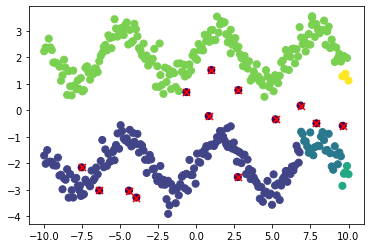

In [6]:
from sklearn.cluster import DBSCAN

# Definimos el modelo de DBSCAN con hiper-parámetros para definir la densidad
dbscan = DBSCAN(eps=0.5, min_samples=3)

# Ajustamos el modelo a los datos
y_dbscan = dbscan.fit_predict(X)

# Visualizamos los datos con los clusters encontrados por DBSCAN
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=50, cmap='viridis')

# Resaltamos los puntos de ruido (etiquetados como -1)
plt.scatter(X[y_dbscan == -1, 0], X[y_dbscan == -1, 1], c='red', s=50, marker='x')
plt.show()

Observamos que con <i>DBSCAN</i> no sólo hemos logrado la clusterización adecuada de los dos grupos originales, sino además ha identificado algunos outliers como no relacionados con ninguno de los dos grupos. 

Pruebe modificando los hiper-parámetrosd d <i>DBSCAN</i>: epsilon y mínimo_en_muestra, ¿que ocurre con la clusterización cuando los modifica?, ¿por qué se da esos cambios? Busque producir más o menos clusteres modificando los hiper-parámetros. 

<b>Gaussian Mixture EM</b>

A continuación analizaremos otra situación donde los datos se comportan en agrupaciones de distinta densidad. No está hecho acá pero usted puede probar <i>K-means</i> y <i>DBSCAN</i>, y notará ambos dan resultados poco adecuados (aunque por distintas razones).

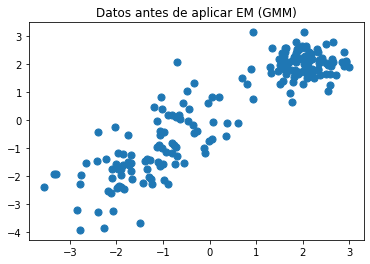

In [7]:
import numpy as np
import matplotlib.pyplot as plt


# Función para generar puntos en una distribución normal circular
def generar_normal_circular(n_puntos, centro, desviacion):
    return np.random.normal(loc=centro, scale=desviacion, size=(n_puntos, 2))

# Función para generar puntos en una distribución elíptica
def generar_eliptica(n_puntos, centro, covarianza):
    return np.random.multivariate_normal(mean=centro, cov=covarianza, size=n_puntos)

# Generamos los puntos de distintas distribuciones
puntos_normales = generar_normal_circular(100, centro=[2, 2], desviacion=0.4)
puntos_elipticos = generar_eliptica(100, centro=[-1, -1], covarianza=[[1, 0.8], [0.8, 1.5]])

# Combinamos todos los puntos en un solo conjunto de datos
X = np.vstack([puntos_normales, puntos_elipticos])

# Visualizamos los datos generados
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Datos antes de aplicar EM (GMM)")
plt.show()

Usaremos <i>EM Gaussian Mix</i> para recuperar el grupamiento natural de estos datos. 

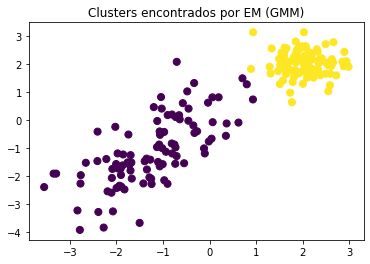

In [8]:
from sklearn.mixture import GaussianMixture

# Definimos el modelo de Gaussian Mixture (EM)
gmm = GaussianMixture(n_components=2, covariance_type='full')

# Ajustamos el modelo a los datos
gmm.fit(X)

# Predecimos las etiquetas de los clusters
y_gmm = gmm.predict(X)

# Visualizamos los resultados con los clusters encontrados
plt.scatter(X[:, 0], X[:, 1], c=y_gmm, s=50, cmap='viridis')
plt.title("Clusters encontrados por EM (GMM)")
plt.show()


Se observa que este algoritmo logra reconocer mejor la fronter entre ambos clustres, pese a que hay observaciones que estando má cerca de un centroide quedan asignadas al otro clusterer. Esto quiere decir que el algoritmo reconoce que una observación es más probable haya sido generada por un cluster incluso si su centro está más lejano que otro cluster con menos probabilidad de haber generado esa misma observación. 

<b>CLUSTERING en exploración de datos más realistas</b>

Usaremos un set de datos público que contiene observación de hábitos de consumo de clientes de una empresa. Se trata de más de dos mil clientes, cuyos atributos son:

<ul>
  <li><strong>ID</strong>: Identificador único del cliente.</li>
  <li><strong>Year_Birth</strong>: Año de nacimiento del cliente.</li>
  <li><strong>Education</strong>: Nivel educativo del cliente.</li>
  <li><strong>Marital_Status</strong>: Estado civil del cliente.</li>
  <li><strong>Income</strong>: Ingreso anual del hogar del cliente.</li>
  <li><strong>Kidhome</strong>: Número de niños en el hogar del cliente.</li>
  <li><strong>Teenhome</strong>: Número de adolescentes en el hogar del cliente.</li>
  <li><strong>Recency</strong>: Número de días desde la última compra del cliente.</li>
  <li><strong>MntWines</strong>: Cantidad gastada en vino en los últimos 2 años.</li>
  <li><strong>MntFruits</strong>: Cantidad gastada en frutas en los últimos 2 años.</li>
  <li><strong>MntMeatProducts</strong>: Cantidad gastada en productos cárnicos en los últimos 2 años.</li>
  <li><strong>MntFishProducts</strong>: Cantidad gastada en productos de pescado en los últimos 2 años.</li>
  <li><strong>MntSweetProducts</strong>: Cantidad gastada en dulces en los últimos 2 años.</li>
  <li><strong>MntGoldProds</strong>: Cantidad gastada en productos de oro en los últimos 2 años.</li>
  <li><strong>NumDealsPurchases</strong>: Número de compras realizadas con descuento.</li>
  <li><strong>NumWebPurchases</strong>: Número de compras realizadas a través del sitio web de la empresa.</li>
  <li><strong>NumCatalogPurchases</strong>: Número de compras realizadas utilizando un catálogo.</li>
  <li><strong>NumStorePurchases</strong>: Número de compras realizadas directamente en tiendas.</li>
  <li><strong>NumWebVisitsMonth</strong>: Número de visitas al sitio web de la empresa en el último mes.</li>
      <li><strong>AcceptedCmp1</strong>: 1 si el cliente aceptó la oferta en la primera campaña, 0 en caso contrario.</li>
  <li><strong>AcceptedCmp2</strong>: 1 si el cliente aceptó la oferta en la segunda campaña, 0 en caso contrario.</li>
  <li><strong>AcceptedCmp3</strong>: 1 si el cliente aceptó la oferta en la tercera campaña, 0 en caso contrario.</li>
  <li><strong>AcceptedCmp4</strong>: 1 si el cliente aceptó la oferta en la cuarta campaña, 0 en caso contrario.</li>
  <li><strong>AcceptedCmp5</strong>: 1 si el cliente aceptó la oferta en la quinta campaña, 0 en caso contrario.</li>
  <li><strong>Complain</strong>: 1 si el cliente se ha quejado en los últimos 2 años, 0 en caso contrario.</li>
  <li><strong>Response</strong>: 1 si el cliente aceptó la oferta en la última campaña, 0 en caso contrario.</li>
</ul>


In [9]:
import pandas as pd

# Cargamos los datos en un dataframe de pandas
datos_origen = pd.read_csv("marketing_campaign_forClustering.csv", sep=",")
datos_origen.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,3,6,5,0,0,0,0,0,0,0


In [10]:
# Identificamos cuantas observaciones y atributos hay
datos_origen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

In [11]:
datos = datos_origen.copy()
# Buscamos atributos con valores faltantes
datos.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
dtype: bool

In [12]:
# Imputamos faltantes usando media aritmética
datos['Income'] = datos['Income'].fillna(datos['Income'].mean())
datos.isna().any() 

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
dtype: bool

In [13]:
from sklearn.preprocessing import OneHotEncoder

# Identificamos todos los atributos categóricos
categoricos = []
for i in datos.columns:
    if (datos[i].dtypes == "object"):
        categoricos.append(i)
print('Son variables Categóricas:', categoricos)

# Realizamos la codificación one-hot para el atributo categórico 'Categoria'
datos = pd.get_dummies(datos, columns=categoricos)

Son variables Categóricas: ['Education', 'Marital_Status']


In [14]:
# Identificamos cuantas observaciones y atributos hay
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2240 non-null   int64  
 1   Year_Birth               2240 non-null   int64  
 2   Income                   2240 non-null   float64
 3   Kidhome                  2240 non-null   int64  
 4   Teenhome                 2240 non-null   int64  
 5   Recency                  2240 non-null   int64  
 6   MntWines                 2240 non-null   int64  
 7   MntFruits                2240 non-null   int64  
 8   MntMeatProducts          2240 non-null   int64  
 9   MntFishProducts          2240 non-null   int64  
 10  MntSweetProducts         2240 non-null   int64  
 11  MntGoldProds             2240 non-null   int64  
 12  NumDealsPurchases        2240 non-null   int64  
 13  NumWebPurchases          2240 non-null   int64  
 14  NumCatalogPurchases     

In [15]:
from sklearn.preprocessing import MinMaxScaler

# Inicializamos el escalador Min-Max
scaler = MinMaxScaler()

# Aplicamos el escalado Min-Max a todos los atributos 
# excepto 'ID' que no debe ser escalado, y dado que no nos sirve lo eliminamos
datos = pd.DataFrame(scaler.fit_transform(datos.drop(columns=['ID'])), columns=datos.columns[1:])

# Identificamos cuantas observaciones y atributos hay
datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_Birth               2240 non-null   float64
 1   Income                   2240 non-null   float64
 2   Kidhome                  2240 non-null   float64
 3   Teenhome                 2240 non-null   float64
 4   Recency                  2240 non-null   float64
 5   MntWines                 2240 non-null   float64
 6   MntFruits                2240 non-null   float64
 7   MntMeatProducts          2240 non-null   float64
 8   MntFishProducts          2240 non-null   float64
 9   MntSweetProducts         2240 non-null   float64
 10  MntGoldProds             2240 non-null   float64
 11  NumDealsPurchases        2240 non-null   float64
 12  NumWebPurchases          2240 non-null   float64
 13  NumCatalogPurchases      2240 non-null   float64
 14  NumStorePurchases       

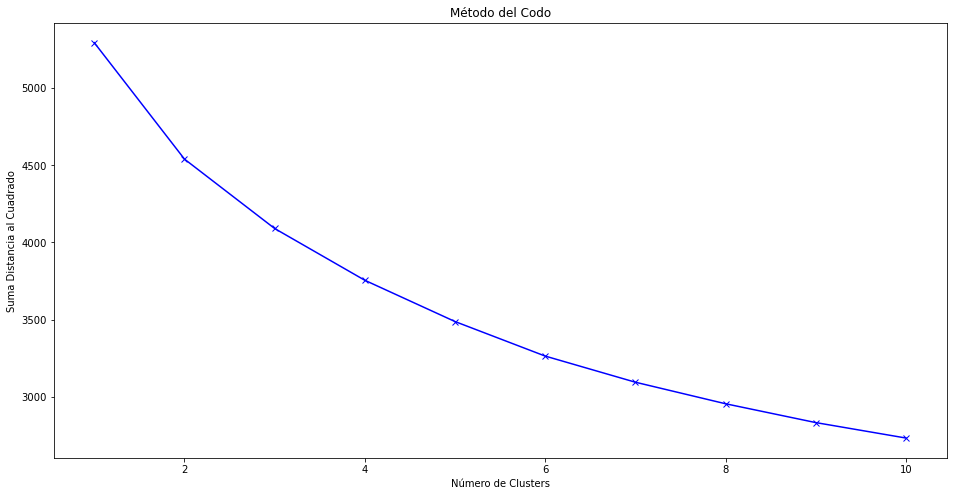

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distancia=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(datos)
    distancia.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),distancia, 'bx-')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Suma Distancia al Cuadrado')
plt.show()

No hay una cantidad de clusteres que sea significativa y claramente más adecuada, pero observamos que 2 clusteres se ve bien. 

In [17]:
# Volvemos a aplicar k-means para dos cluster, y guardamos la clusterización resultante.
kmeans=KMeans(n_clusters=2).fit(datos)
clusters=kmeans.predict(datos)

# Agregamos la clusterización a los datos originales
datos_origen['cluster'] = clusters

datos_origen.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,cluster
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,4,7,0,0,0,0,0,0,1,1
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,2,5,0,0,0,0,0,0,0,1
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,...,10,4,0,0,0,0,0,0,0,1
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,...,4,6,0,0,0,0,0,0,0,1
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,6,5,0,0,0,0,0,0,0,0


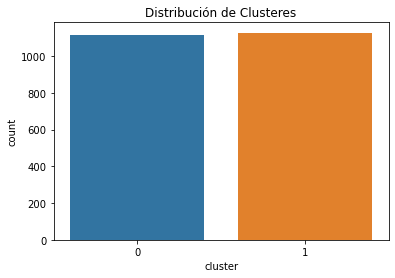

In [18]:
import seaborn as sns

#Visualizamos los clustere
pl = sns.countplot(x=datos_origen["cluster"])
pl.set_title("Distribución de Clusteres")
plt.show()

Podemos analizar cada cluster, por ejemplo calculando el valor promedio (media aritmética) de cada atributo, que es lo que conocemos como <b>Centroide</b>. 

In [19]:
import pandas as pd

# Calculamos los centroides de cada cluster utilizando Media Arimética de los atributos numéricos
centroides = datos_origen.groupby('cluster').mean()

# Redondeamos los valores a dos decimales para mejorar la legibilidad
centroides = centroides.round(2)

# Transponemos el DataFrame para que los clusters sean columnas y los atributos sean filas
centroides_transposed = centroides.T

# Mejoramos el formato de visualización utilizando `style`
centroides_styled = centroides_transposed.style.format(precision=2).set_caption("Reporte de Centroides de Cada Cluster").set_table_styles(
    [{'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold')]}]
)

# Mostramos el reporte con estilo mejorado
centroides_styled


cluster,0,1
ID,5531.04,5652.52
Year_Birth,1967.97,1969.64
Income,51767.25,52720.37
Kidhome,0.44,0.44
Teenhome,0.52,0.49
Recency,48.17,50.04
MntWines,323.85,284.27
MntFruits,21.77,30.77
MntMeatProducts,154.25,179.49
MntFishProducts,31.83,43.15


También podemos visualizar la distribución de observaciones en cada atributo, de cada cluster. Para ello usaremos diagrmas de tipo boxplot en los atributos numéricos, e histogramas en los atributos categóricos.  

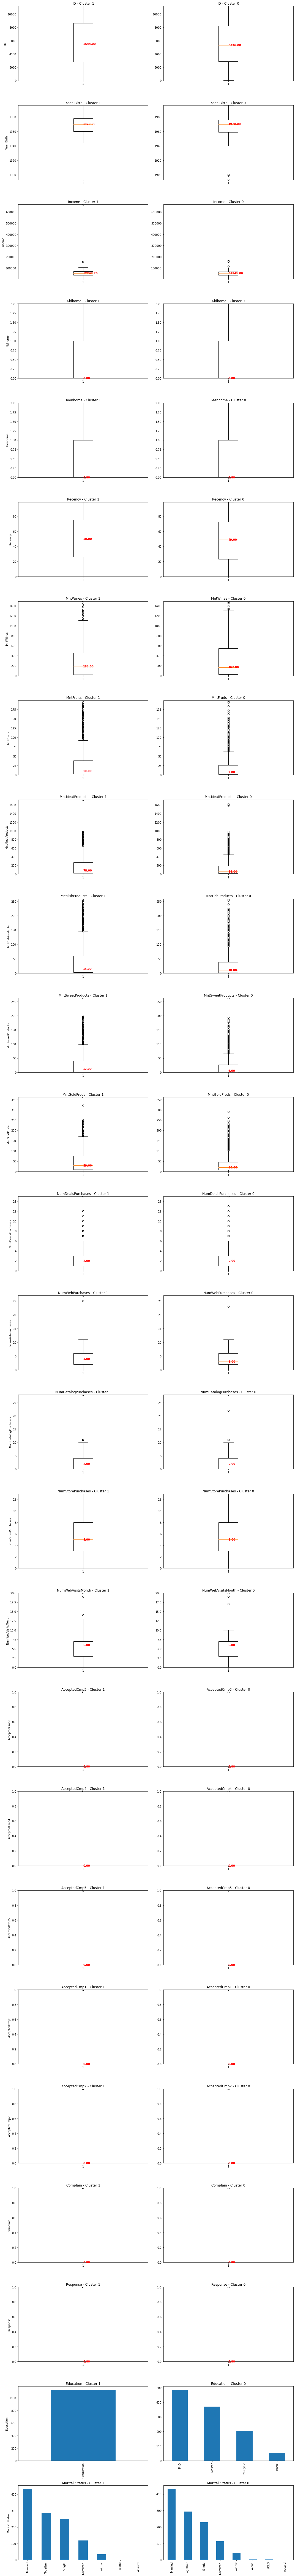

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Imputamos valor faltante en Income para que se pueda plotear
datos_origen['Income'] = datos_origen['Income'].fillna(datos_origen['Income'].mean())

# Identificamos las columnas numéricas y categóricas, excluyendo la columna 'cluster'.
numerical_columns = datos_origen.select_dtypes(include=['number']).columns.drop('cluster')
categorical_columns = datos_origen.select_dtypes(exclude=['number']).columns
clusters = datos_origen['cluster'].unique()

# Calculamos los rangos (mínimo y máximo) para cada atributo numérico
y_limits = {column: (datos_origen[column].min(), datos_origen[column].max()) for column in numerical_columns}

# Configuramos la grilla para los diagramas de caja y bigotes e histogramas
fig, axes = plt.subplots(len(numerical_columns) + len(categorical_columns), len(clusters), figsize=(15, 5 * (len(numerical_columns) + len(categorical_columns))))

# Iteramos sobre cada atributo numérico
for i, column in enumerate(numerical_columns):
    for j, cluster in enumerate(clusters):
        # Filtramos los datos para el cluster actual
        data = datos_origen[datos_origen['cluster'] == cluster][column]
        # Dibujamos el diagrama de cajas y bigotes en la grilla correspondiente
        axes[i, j].boxplot(data)
        axes[i, j].set_title(f'{column} - Cluster {cluster}')
        
        # Ajustamos el rango del eje y para que sea el mismo en todos los clusters
        axes[i, j].set_ylim(y_limits[column])
        
        # Calculamos la mediana y lo etiquetamos en el gráfico
        median_value = data.median()
        axes[i, j].text(1, median_value, f'{median_value:.2f}', verticalalignment='center', color='red', fontweight='bold')
        
        # Si es la primera columna, etiquetamos el eje y
        if j == 0:
            axes[i, j].set_ylabel(column)

# Iteramos sobre cada atributo categórico
for i, column in enumerate(categorical_columns):
    for j, cluster in enumerate(clusters):
        # Filtramos los datos para el cluster actual
        data = datos_origen[datos_origen['cluster'] == cluster][column]
        # Dibujamos un histograma de frecuencias en la grilla correspondiente
        data.value_counts().plot(kind='bar', ax=axes[len(numerical_columns) + i, j])
        axes[len(numerical_columns) + i, j].set_title(f'{column} - Cluster {cluster}')
        
        # Si es la primera columna, etiquetamos el eje y
        if j == 0:
            axes[len(numerical_columns) + i, j].set_ylabel(column)

# Ajustamos el espacio entre subplots
plt.tight_layout()
plt.show()


Usando estas visualizaciones podríamos buscar diferencias entre los clusteres, que pudieran ayudar a entender mejor el comportamiento de los clientes que agrupo en cada uno de ellos. 

Seguiríamos explorando el set de datos realizando nuevos agrupamientos, usando distinto número de clusteres, reduciendo el número de atributos, enfocando el análisis en sólo algunos atributos, probando otros algoritmos de clustering. Ello nos podría llevar a identificar características "estructurales" de los datos que resulten relevantes en el contexto del negocio y/o problema al que se aboca el proyecto, y eso podría servir para una mejor comprensión de datos y negocio, así como para apoyar decisiones respecto al mismo proyecto.

Les queda como tarea seguir explorando este set de datos, vea que cosas puede encontrar que podrían ser de interés a la hora de segmentar clientes, considere que esto es material de estudio de la asignatura. 
